In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [104]:
data = pd.read_csv('Student_performance_data _.csv')

In [105]:
data.head()

#gender 0 = male, 1 = female
#parental education none 0 -> 4 higher
#ethnicitiy 0= caucasian, 1=african american, 2=asian, 3=other
#tutoring, extracurricular, sports, music (activity), volunteering: 0=no, 1=yes
#parentalsupport 0=none -> 4=very high

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [106]:
print(data.isnull().sum()) #data already has no null values so no row dropping/ column mean calculating is required

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [107]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


C:\Users\super\AppData\Local\Temp\ipykernel_17836\257271614.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="GradeClass", data=data, palette="viridis", ax=axes[1, 1])


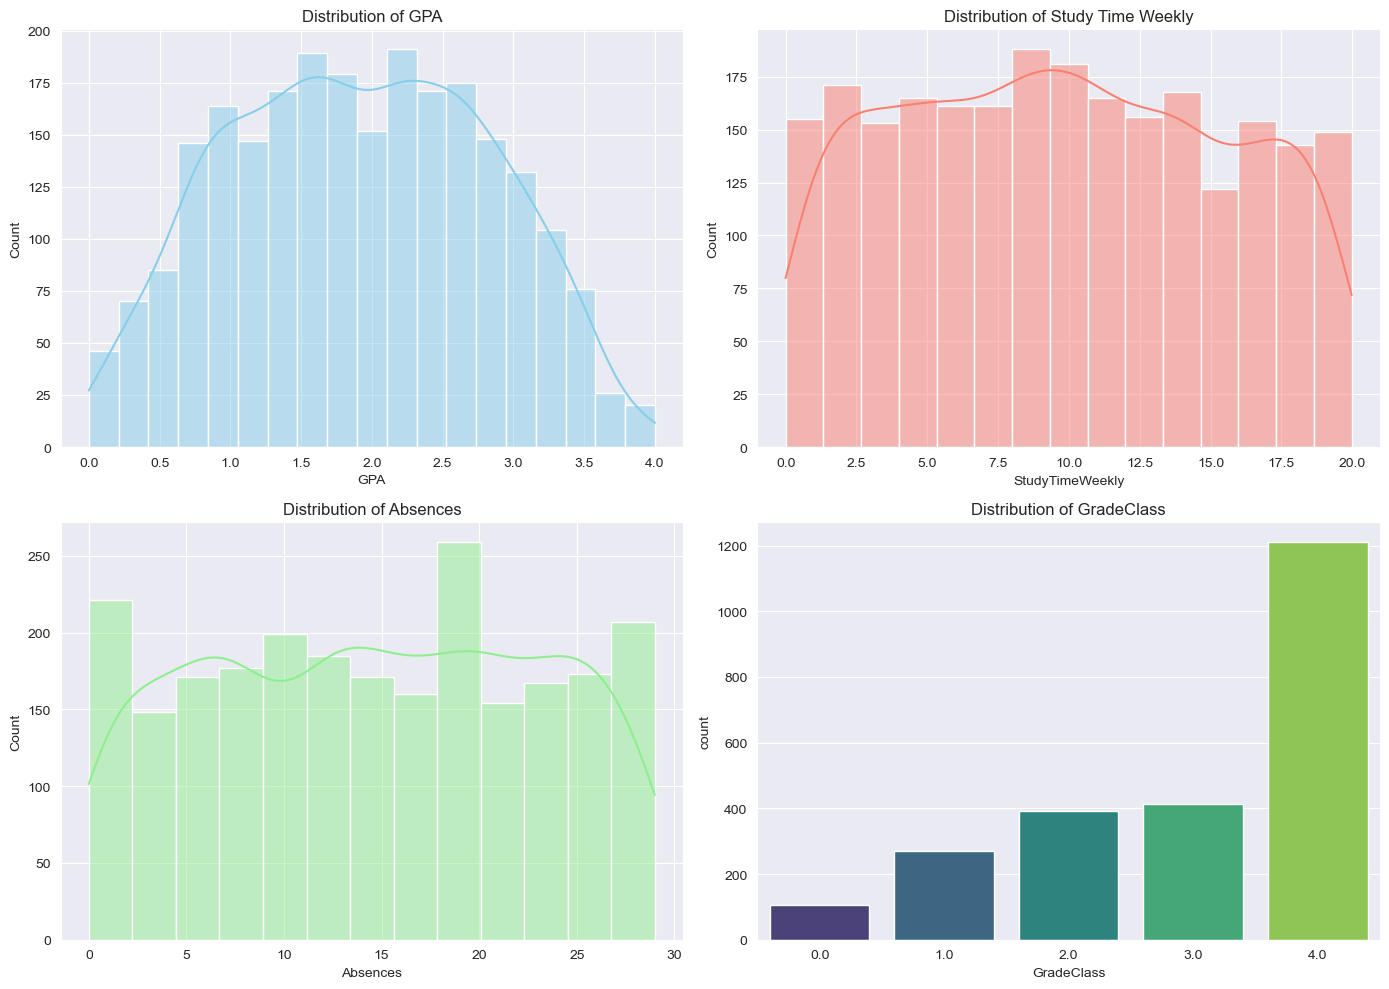

In [108]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(data["GPA"], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Distribution of GPA")

sns.histplot(data["StudyTimeWeekly"], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title("Distribution of Study Time Weekly")

sns.histplot(data["Absences"], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title("Distribution of Absences")

sns.countplot(x="GradeClass", data=data, palette="viridis", ax=axes[1, 1])
axes[1, 1].set_title("Distribution of GradeClass")

plt.tight_layout()
plt.show()

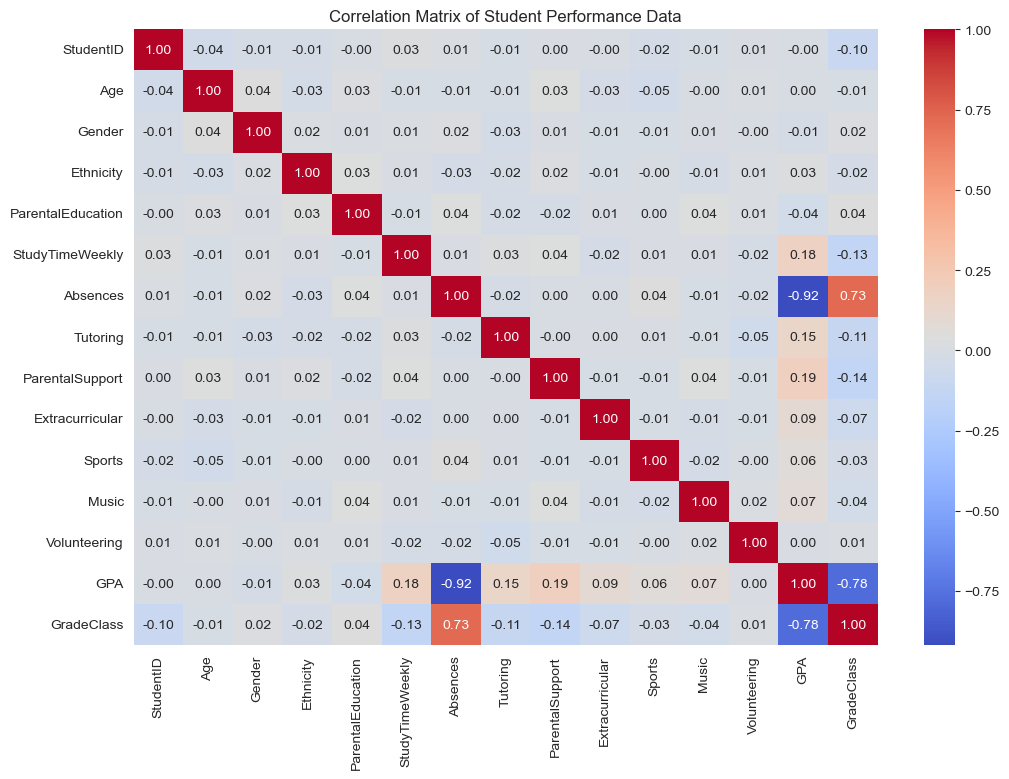

In [109]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Student Performance Data")
plt.show()

#notes: A=0 - E=5, The lower the grade class the better it is, so the higher the GPA, the lower the grade class. 
#Anything that increases Grade class is a negative influence, anything that decreases grade class (negative number) is a positive influence

In [110]:
data = data.drop(columns=['StudentID', 'Age', 'Gender', 'Ethnicity', 'GPA' ]) #drops columns that would cause the AI to create a bias based on traits that shouldn't be taken into account. or in the case of studentID somehow having a correlation with improving the grade class.
#GPA is dropped as grade class is determined solely by it, we want to find how other attributes impact the grade class.

data.head()

,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,2,19.833723,7,1,2,0,0,1,0,2.0
1,1,15.408756,0,0,1,0,0,0,0,1.0
2,3,4.210570,26,0,2,0,0,0,0,4.0
3,3,10.028829,14,0,3,1,0,0,0,3.0
4,2,4.672495,17,1,3,0,0,0,0,4.0


In [111]:
#feature column: 
xColumns = []
for x in data.columns:
    if x != 'GradeClass':
        xColumns.append(x)

In [112]:
X = data[xColumns].values
y = data['GradeClass'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#split testing and training sets.

In [113]:
print(xColumns)

['ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']


In [114]:
sm = SMOTE(random_state=42)
X_resampled_train, y_resampled_train = sm.fit_resample(X_train, y_train)

C:\Users\super\AppData\Local\Temp\ipykernel_17836\3789947223.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="GradeClass", data=data, palette="viridis", ax=axes[0])


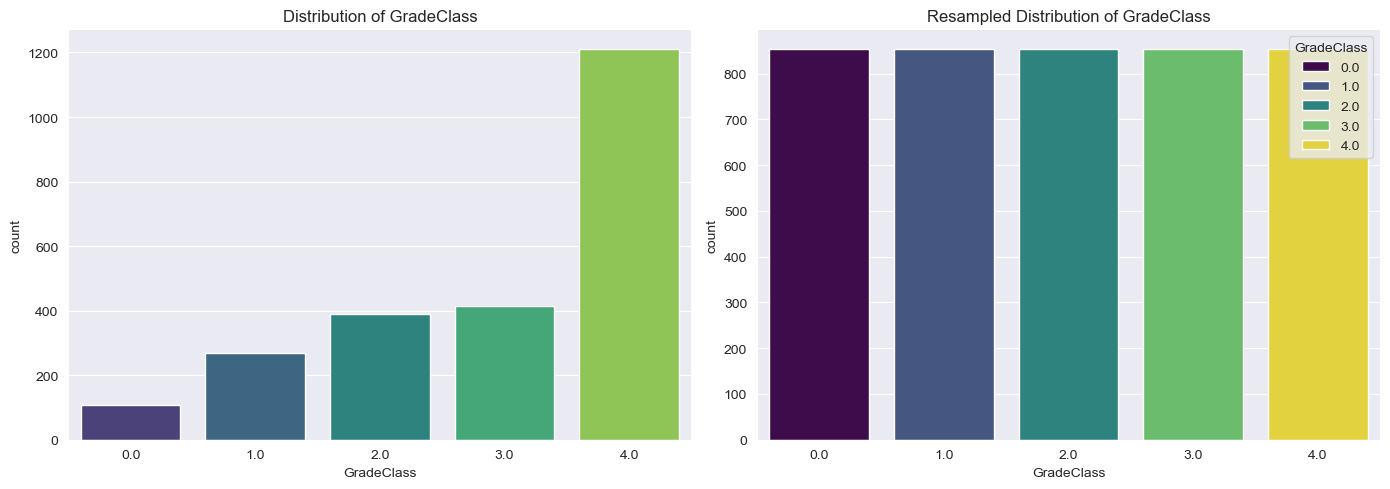

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(x="GradeClass", data=data, palette="viridis", ax=axes[0])
axes[0].set_title("Distribution of GradeClass")

data_resampled = pd.DataFrame(X_resampled_train, columns=xColumns)
data_resampled['GradeClass'] = y_resampled_train

sns.countplot(x="GradeClass", data=data_resampled, palette="viridis", hue="GradeClass", ax=axes[1])
axes[1].set_title("Resampled Distribution of GradeClass")

plt.tight_layout()
plt.show()

In [116]:
data_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4270 entries, 0 to 4269
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ParentalEducation  4270 non-null   float64
 1   StudyTimeWeekly    4270 non-null   float64
 2   Absences           4270 non-null   float64
 3   Tutoring           4270 non-null   float64
 4   ParentalSupport    4270 non-null   float64
 5   Extracurricular    4270 non-null   float64
 6   Sports             4270 non-null   float64
 7   Music              4270 non-null   float64
 8   Volunteering       4270 non-null   float64
 9   GradeClass         4270 non-null   float64
dtypes: float64(10)
memory usage: 333.7 KB


In [117]:
param_grid = {
    'C' : [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'class_weight': [None, 'balanced']
}

In [118]:
svc = SVC(random_state=42)

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy Score:", grid_search.best_score_)

grid_search.fit(X_resampled_train, y_resampled_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy Score:", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 100, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validated Accuracy Score: 0.7604611672178032
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 100, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validated Accuracy Score: 0.9215456674473067


In [78]:
svm_original = SVC(C=100,kernel='rbf',gamma='auto',class_weight=None, random_state=42)
svm_original.fit(X_train, y_train)
y_pred_original = svm_original.predict(X_test)

print("Performance on Original Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("Classification Report:\n", classification_report(y_test, y_pred_original))

Performance on Original Data:
Accuracy: 0.6559888579387186
Classification Report:
               precision    recall  f1-score   support

         0.0       0.44      0.36      0.40        33
         1.0       0.43      0.47      0.45        80
         2.0       0.51      0.53      0.52       121
         3.0       0.46      0.44      0.45       127
         4.0       0.85      0.84      0.84       357

    accuracy                           0.66       718
   macro avg       0.54      0.53      0.53       718
weighted avg       0.66      0.66      0.66       718



In [126]:
svm_resampled = SVC(C=10,kernel='rbf',gamma='auto',class_weight=None, random_state=42)
svm_resampled.fit(X_resampled_train, y_resampled_train)
y_pred_resampled = svm_resampled.predict(X_test)
print("\nPerformance on Resampled Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_resampled))


Performance on Resampled Data:
Accuracy: 0.6392757660167131
Classification Report:
               precision    recall  f1-score   support

         0.0       0.22      0.36      0.28        33
         1.0       0.40      0.50      0.44        80
         2.0       0.54      0.57      0.55       121
         3.0       0.56      0.51      0.53       127
         4.0       0.86      0.76      0.81       357

    accuracy                           0.64       718
   macro avg       0.51      0.54      0.52       718
weighted avg       0.67      0.64      0.65       718



In [120]:
default_svm = SVC(random_state=42)
default_svm.fit(X_resampled_train, y_resampled_train)
y_pred_resampled_default = default_svm.predict(X_test)
print("\nPerformance on Resampled Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_resampled_default))


Performance on Resampled Data:
Accuracy: 0.7019498607242339
Classification Report:
               precision    recall  f1-score   support

         0.0       0.46      0.55      0.50        33
         1.0       0.50      0.41      0.45        80
         2.0       0.55      0.53      0.54       121
         3.0       0.51      0.69      0.59       127
         4.0       0.92      0.85      0.88       357

    accuracy                           0.70       718
   macro avg       0.59      0.60      0.59       718
weighted avg       0.72      0.70      0.71       718



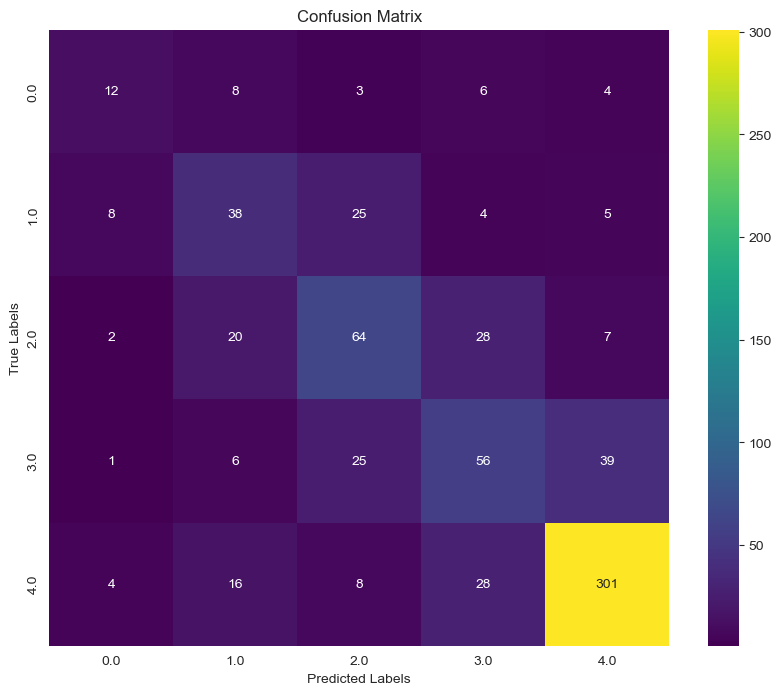

In [42]:
cm = confusion_matrix(y_test, y_pred_original)

plt.figure(figsize=(10, 8))
sns.heatmap(cm,annot=True,fmt="d",cmap="viridis", cbar=True,xticklabels=svm_original.classes_,yticklabels=svm_original.classes_,  )
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()